In [77]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [78]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 15_12_2022 02_32_55.xlsx'

In [79]:
'''if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')'''

"if not os.path.exists(f'Z:\\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):\n    os.makedirs(f'Z:\\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')"

In [80]:
#dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 12_12_2022 07_32_58.xlsx')

In [81]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [82]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza A',2:'Influenza B'})

In [83]:
#dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
#4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [84]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza nao subtipado',
4:'Influenza nao subtipado',5:'Influenza nao subtipado',6:'Influenza nao subtipado'})

In [85]:
filtro = dados[['Sem Epi Evolucao','Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro = filtro.loc[filtro['Evolucao']=='Óbito']
filtro

,Sem Epi Evolucao,Classificacao final,Evolucao,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
3,2020_04,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
5,2020_06,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
11,2020_13,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
12,2020_06,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
18,2020_06,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185505,2022_25,SRAG por outro vírus resp,Óbito,NaN,NaN,NaN,1.0
185515,2022_38,COVID-19,Óbito,NaN,NaN,NaN,NaN
185521,2022_43,COVID-19,Óbito,Nao,NaN,NaN,1.0
185525,2022_39,SRAG não especificado,Óbito,NaN,NaN,NaN,NaN


In [110]:
teste = filtro['pcr_vsr'].to_list()
teste = teste[5:10]
for i in range(0,6,1):
    if teste[i] == np.nan():
        print('Ok')


TypeError: 'float' object is not callable

In [86]:
base = filtro.groupby('Sem Epi Evolucao').count()
base

,Classificacao final,Evolucao,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Sem Epi Evolucao,,,,,,
2020_03,5,5,0,0,0,0
2020_04,6,6,0,0,0,0
2020_05,6,6,1,1,0,0
2020_06,4,4,0,0,0,0
2020_07,1,1,0,0,0,0
...,...,...,...,...,...,...
2022_45,19,19,3,1,1,0
2022_46,26,26,7,0,0,0
2022_47,28,28,8,0,0,0


In [87]:
influH1 = filtro.loc[filtro['pcr_fluasu']=='Influenza A(H1N1)pdm09']
influH1 = influH1.groupby('Sem Epi Evolucao').count()
influH1 = influH1.merge(base, how='outer',right_index=True, left_index=True)
influH1 = influH1.fillna(0)
influH1

,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Evolucao,,,,,,,,,,,,
2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,1,0,0
2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022_45,1.0,1.0,1.0,1.0,1.0,0.0,19,19,3,1,1,0
2022_46,0.0,0.0,0.0,0.0,0.0,0.0,26,26,7,0,0,0
2022_47,0.0,0.0,0.0,0.0,0.0,0.0,28,28,8,0,0,0


In [88]:
influH1 = influH1['pcr_fluasu_x']

In [89]:
influH3 = filtro.loc[filtro['pcr_fluasu']=='Influenza A(H3N2)']
influH3 = influH3.groupby('Sem Epi Evolucao').count()
influH3 = influH3.merge(base, how='outer',right_index=True, left_index=True)
influH3 = influH3.fillna(0)
influH3

,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Evolucao,,,,,,,,,,,,
2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,1,0,0
2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022_45,0.0,0.0,0.0,0.0,0.0,0.0,19,19,3,1,1,0
2022_46,0.0,0.0,0.0,0.0,0.0,0.0,26,26,7,0,0,0
2022_47,0.0,0.0,0.0,0.0,0.0,0.0,28,28,8,0,0,0


In [90]:
influH3 = influH3['pcr_fluasu_x']

In [91]:
influNaoSubtipado = filtro.loc[filtro['pcr_fluasu']=='Influenza nao subtipado']
influNaoSubtipado = influNaoSubtipado.groupby('Sem Epi Evolucao').count()
influNaoSubtipado = influNaoSubtipado.merge(base, how='outer',right_index=True, left_index=True)
influNaoSubtipado = influNaoSubtipado.fillna(0)
influNaoSubtipado

,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Evolucao,,,,,,,,,,,,
2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2020_05,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,1,0,0
2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022_45,0.0,0.0,0.0,0.0,0.0,0.0,19,19,3,1,1,0
2022_46,0.0,0.0,0.0,0.0,0.0,0.0,26,26,7,0,0,0
2022_47,0.0,0.0,0.0,0.0,0.0,0.0,28,28,8,0,0,0


In [92]:
influNaoSubtipado = influNaoSubtipado['pcr_fluasu_x']

In [93]:
influB = filtro.loc[filtro['tp_flu_pcr']=='Influenza B'] #pega as linhas onde tem Influenza B
influB = influB.groupby('Sem Epi Evolucao').count() #Agrupa por semana de internação e faz uma contagem
influB = influB.merge(base, how='outer',right_index=True, left_index=True) #Apenas para ter todas as semanas, mesmo que zeradas
influB = influB.fillna(0) #Substitui NaN (vazio) por zero
influB

,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
Sem Epi Evolucao,,,,,,,,,,,,
2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2020_05,1.0,1.0,1.0,1.0,0.0,0.0,6,6,1,1,0,0
2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022_45,0.0,0.0,0.0,0.0,0.0,0.0,19,19,3,1,1,0
2022_46,0.0,0.0,0.0,0.0,0.0,0.0,26,26,7,0,0,0
2022_47,0.0,0.0,0.0,0.0,0.0,0.0,28,28,8,0,0,0


In [94]:
influB = influB['tp_flu_pcr_x'] #Pega os valores da coluna pcr_fluasu_x

In [95]:
vsr = filtro.loc[filtro['pcr_vsr']==1]
vsr = vsr.groupby('Sem Epi Evolucao').count()
vsr = vsr.reset_index()
vsr = vsr.merge(base, how='right', on='Sem Epi Evolucao')
vsr = vsr.fillna(0)
vsr

,Sem Epi Evolucao,Classificacao final_x,Evolucao_x,pos_pcrflu_x,tp_flu_pcr_x,pcr_fluasu_x,pcr_vsr_x,Classificacao final_y,Evolucao_y,pos_pcrflu_y,tp_flu_pcr_y,pcr_fluasu_y,pcr_vsr_y
0,2020_03,0.0,0.0,0.0,0.0,0.0,0.0,5,5,0,0,0,0
1,2020_04,0.0,0.0,0.0,0.0,0.0,0.0,6,6,0,0,0,0
2,2020_05,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,1,0,0
3,2020_06,0.0,0.0,0.0,0.0,0.0,0.0,4,4,0,0,0,0
4,2020_07,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2022_45,0.0,0.0,0.0,0.0,0.0,0.0,19,19,3,1,1,0
148,2022_46,0.0,0.0,0.0,0.0,0.0,0.0,26,26,7,0,0,0
149,2022_47,0.0,0.0,0.0,0.0,0.0,0.0,28,28,8,0,0,0
150,2022_48,0.0,0.0,0.0,0.0,0.0,0.0,42,42,13,0,0,0


In [97]:
vsr = vsr['pcr_vsr_x']
vsr

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
147    0.0
148    0.0
149    0.0
150    0.0
151    0.0
Name: pcr_vsr_x, Length: 152, dtype: float64

In [98]:
semana = base.reset_index()
semana = semana['Sem Epi Evolucao']
semana

0      2020_03
1      2020_04
2      2020_05
3      2020_06
4      2020_07
        ...   
147    2022_45
148    2022_46
149    2022_47
150    2022_48
151    2022_49
Name: Sem Epi Evolucao, Length: 152, dtype: object

In [99]:
legenda = pd.DataFrame(columns=['VSR','Influenza A H1N1','Influenza A H3N2','Influenza A Sem Subtipo','Influenza B'])

In [100]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 13_12_2022'

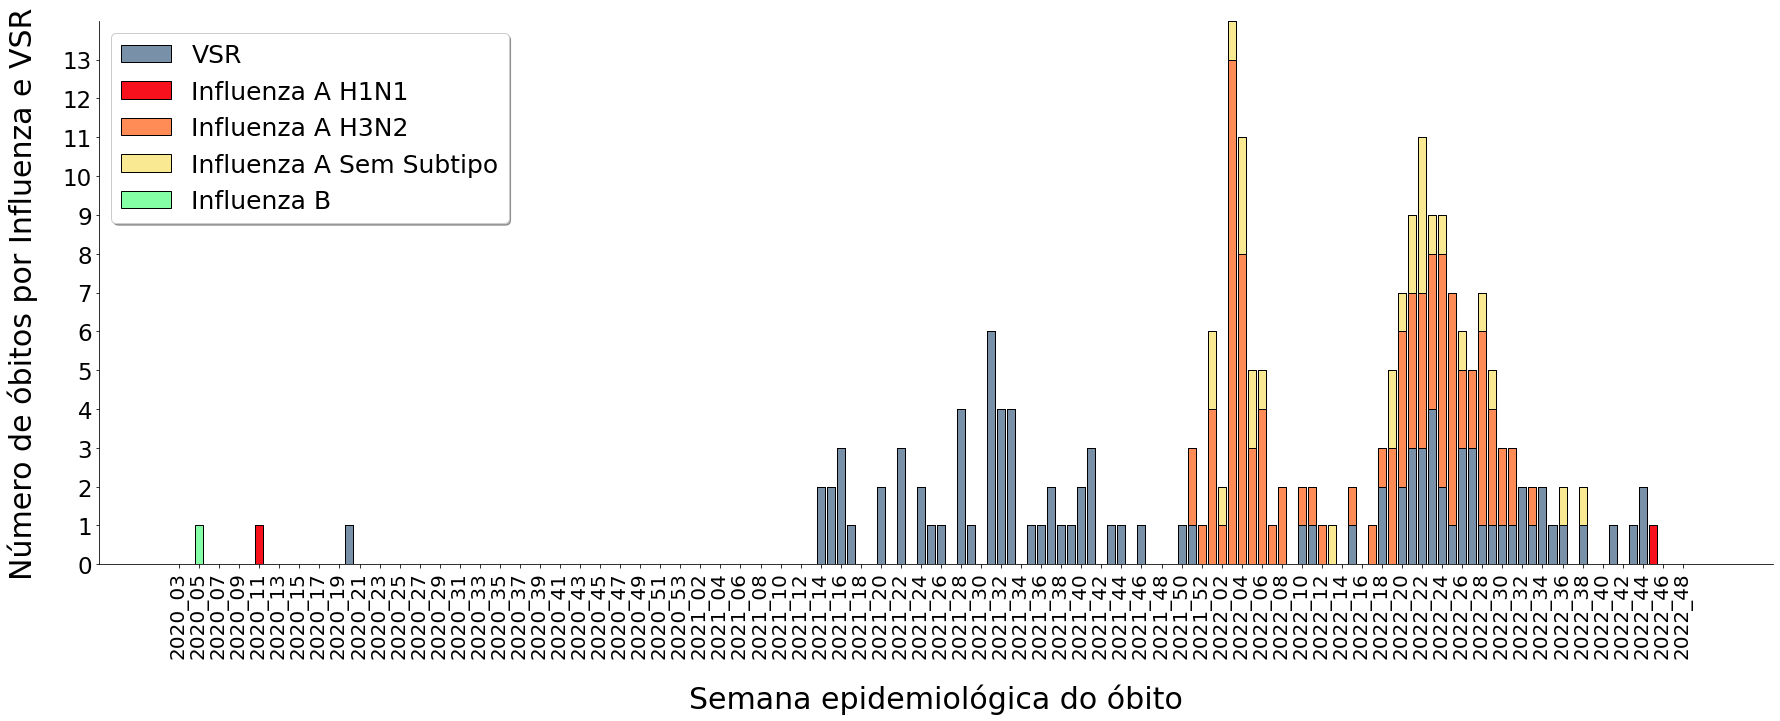

In [101]:
plt.figure(figsize=(30,10))
plt.bar(semana,vsr, color = '#7890a8',edgecolor='#000000')
plt.bar(semana,influH1, bottom=np.array(vsr),color = '#f7111d',edgecolor='#000000')
plt.bar(semana,influH3, bottom=np.array(vsr)+np.array(influH1), color = '#ff8c57',edgecolor='#000000')
plt.bar(semana,influNaoSubtipado, bottom=np.array(vsr)+np.array(influH1)+np.array(influH3), color = '#fae993',edgecolor='#000000')
plt.bar(semana,influB, bottom=np.array(vsr)+np.array(influH1)+np.array(influH3)+np.array(influNaoSubtipado),color = '#85ffa5',edgecolor='#000000')
#plt.bar(semana,influ, bottom = np.array(vsr), color = '#304878',edgecolor='#000000')
sns.despine()
plt.xticks(np.arange(0,np.size(semana),2),rotation=90,fontsize=20)
plt.yticks(np.arange(0,14,1),fontsize=23)
plt.xlabel('Semana epidemiológica do óbito',labelpad=25,fontsize=30)
plt.ylabel('Número de óbitos por Influenza e VSR',labelpad=25,fontsize=30)
plt.legend(legenda,fontsize=25,shadow=True,loc='upper left')
#plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/numeroObito_InfluVSR.png',dpi=300,bbox_inches='tight')